# testing the triplet loader 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

sys.path.append('..')

Loaded 30 alphabets
  Gujarati: 960 images
  Korean: 800 images
  Arcadian: 520 images
  Malay_(Jawi_-_Arabic): 800 images
  Grantha: 860 images
  Blackfoot_(Canadian_Aboriginal_Syllabics): 280 images
  Balinese: 480 images
  Futurama: 520 images
  N_Ko: 660 images
  Burmese_(Myanmar): 680 images
  Anglo-Saxon_Futhorc: 580 images
  Mkhedruli_(Georgian): 820 images
  Latin: 520 images
  Braille: 520 images
  Sanskrit: 840 images
  Japanese_(hiragana): 1040 images
  Tagalog: 340 images
  Greek: 480 images
  Ojibwe_(Canadian_Aboriginal_Syllabics): 280 images
  Japanese_(katakana): 940 images
  Early_Aramaic: 440 images
  Hebrew: 440 images
  Tifinagh: 1100 images
  Asomtavruli_(Georgian): 800 images
  Armenian: 820 images
  Syriac_(Estrangelo): 460 images
  Alphabet_of_the_Magi: 400 images
  Cyrillic: 660 images
  Bengali: 920 images
  Inuktitut_(Canadian_Aboriginal_Syllabics): 320 images


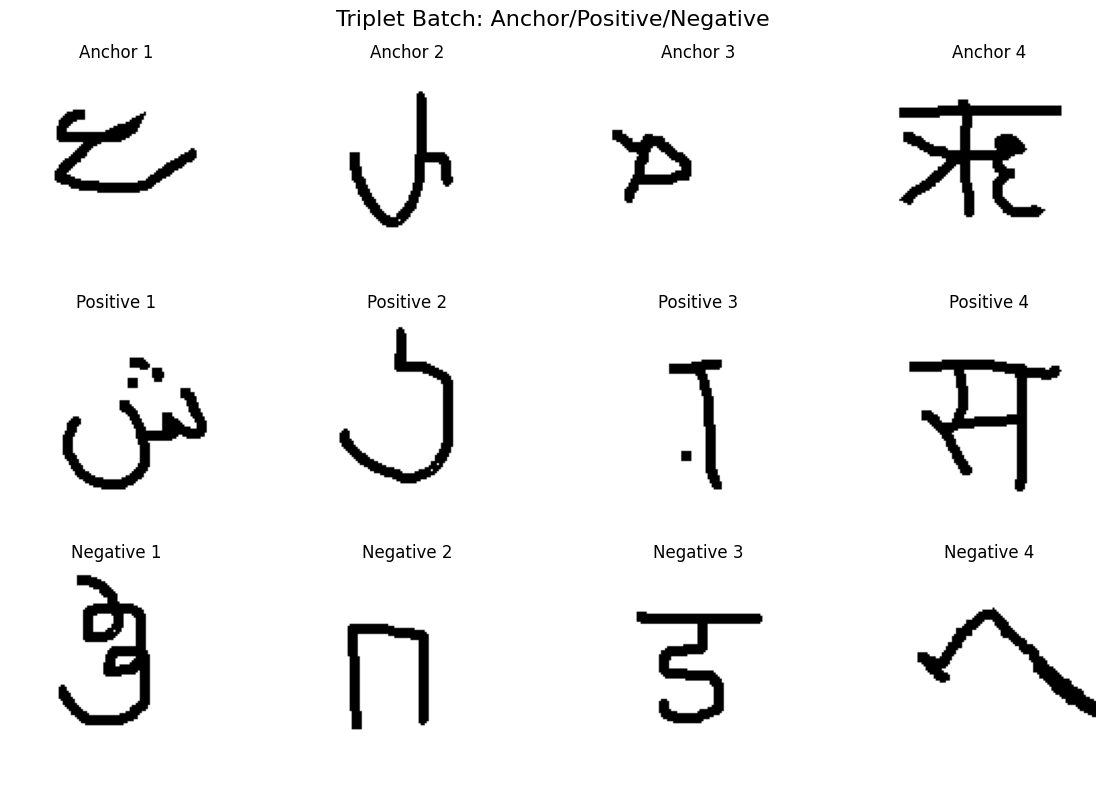

In [2]:
from src.data_loader import OmniglotTripletLoader

loader = OmniglotTripletLoader("../../omniglot/python")
anchors, positives, negatives = loader.generate_batch(4)

# Visualize a batch
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.suptitle('Triplet Batch: Anchor/Positive/Negative', fontsize=16)

for i in range(4):
    axes[0, i].imshow(anchors[i].squeeze(), cmap='gray')
    axes[0, i].set_title(f'Anchor {i+1}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(positives[i].squeeze(), cmap='gray')
    axes[1, i].set_title(f'Positive {i+1}')
    axes[1, i].axis('off')
    
    axes[2, i].imshow(negatives[i].squeeze(), cmap='gray')
    axes[2, i].set_title(f'Negative {i+1}')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

In [3]:
# import and create model 
from src.models import create_triplet_model, triplet_loss

# create triplet model
triplet_model, base_network = create_triplet_model(embedding_dim=128)

# check architecture
triplet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ anchor (InputLayer) │ (None, 105, 105,  │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positive            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ negative            │ (None, 105, 105,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128)       │ 10,770,624 │ anchor[0][0],     │
│ (Sequential)        │                   │            │ positive[0][0],   │
│                     │                   │            │ negative[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,770,624 (41.09 MB)

 Trainable params: 10,767,424 (41.07 MB)

 Non-trainable params: 3,200 (12.50 KB)

In [4]:
from src.models import create_triplet_model
from src.training import train_triplet_model_custom

# Create model (no compile needed)
triplet_model, base_network = create_triplet_model(embedding_dim=128)

# Train with custom loop
history = train_triplet_model_custom(
    triplet_model, 
    loader, 
    epochs=5, 
    batch_size=16, 
    steps_per_epoch=50
)

Epoch 1/5
 Step 0/50 - loss: 52.4029
Debug - Checking if model weights change...
 Step 20/50 - loss: 1006.3934
 Step 40/50 - loss: 365.4167
 Epoch 1 - avg loss: 567.6755
--------------------------------------------------
Epoch 2/5
 Step 0/50 - loss: 213.9392
 Step 20/50 - loss: 59.5228
 Step 40/50 - loss: 145.0474
 Epoch 2 - avg loss: 220.4126
--------------------------------------------------
Epoch 3/5
 Step 0/50 - loss: 396.7448
 Step 20/50 - loss: 147.0695
 Step 40/50 - loss: 186.5654
 Epoch 3 - avg loss: 160.2478
--------------------------------------------------
Epoch 4/5
 Step 0/50 - loss: 44.5801
 Step 20/50 - loss: 82.3475
 Step 40/50 - loss: 63.0658
 Epoch 4 - avg loss: 110.0379
--------------------------------------------------
Epoch 5/5
 Step 0/50 - loss: 36.4172
 Step 20/50 - loss: 53.6532
 Step 40/50 - loss: 18.1771
 Epoch 5 - avg loss: 46.7623
--------------------------------------------------


/Users/gboa/build_space/alph/alphaba/notebooks/../src/training.py:135: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reduced_embeddings_2d[mask, 0],


TypeError: Legend.__init__() got an unexpected keyword argument 'box_to_anchor'. Did you mean 'bbox_to_anchor'?

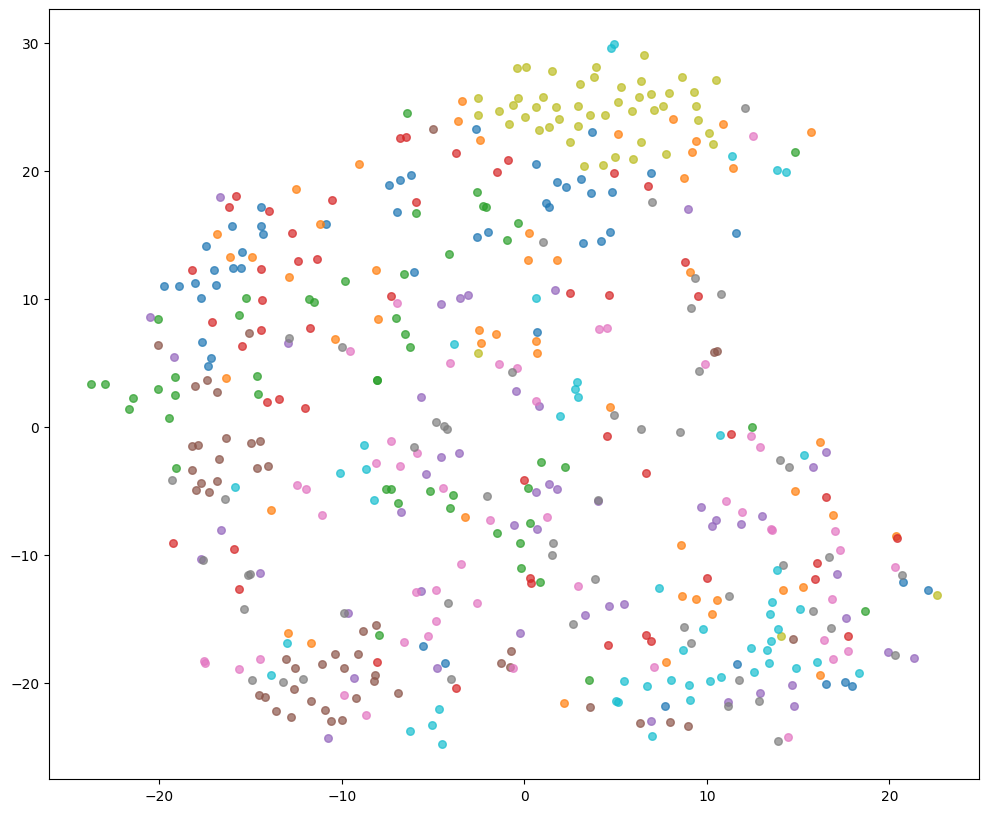

In [5]:
# visualise what model learned:
from src.training import evaluate_embeddings

# create a t-SNE plot of the learned embeddings
embeddings, labels = evaluate_embeddings(triplet_model, loader)

In [ ]:
history = train_triplet_model_custom(
    triplet_model, 
    loader, 
    epochs=3,  # Short test run
    batch_size=16, 
    steps_per_epoch=20  # Quick test
)

# Check if loss is decreasing
print("Loss history:", history['loss'])
plt.plot(history['loss'])
plt.title('Training Loss')
plt.show()